# intro to PyTorch

inspired by [this tutorial](https://docs.pytorch.org/tutorials/beginner/introyt/introyt1_tutorial.html)

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

## tensors

In [2]:
my_tensor = torch.zeros(5,3)
print(my_tensor)
print(my_tensor.dtype)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
torch.float32


In [3]:
## make tensors of integers 16bits
## data types are important when optimizing code,etc
## for example you may want to use 16, 32 bit or 64 bit floating point values for NN
## more bits = more memory and compute cost and more precision
i = torch.ones((5, 3), dtype=torch.int16)
print(i)
print(i.dtype)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)
torch.int16


In [4]:
## create random tensors
r1 = torch.rand(2, 2)
print('A random tensor:')
print(r1)

r2 = torch.rand(2, 2)
print('\nA different random tensor:')
print(r2) # new values

A random tensor:
tensor([[0.0153, 0.4192],
        [0.4668, 0.6635]])

A different random tensor:
tensor([[0.0288, 0.1489],
        [0.6320, 0.2309]])


In [5]:
## more dimensions
r3 = torch.rand(3,2,2)
print(r3)

tensor([[[0.1837, 0.1703],
         [0.6543, 0.3489]],

        [[0.2607, 0.3118],
         [0.7179, 0.6583]],

        [[0.1715, 0.3186],
         [0.9444, 0.8815]]])


In [6]:
print(r3[0])

tensor([[0.1837, 0.1703],
        [0.6543, 0.3489]])


In [7]:
print(r3[1,0])

tensor([0.2607, 0.3118])


In [8]:
print(r3[2,1,1])

tensor(0.8815)


In [9]:
## operations
ones = torch.ones(2, 3)
print(ones)

twos = torch.ones(2, 3) * 2 # every element is multiplied by 2
print(twos)

threes = ones + twos       # addition allowed because shapes are similar
print(threes)              # tensors are added element-wise
print(threes.shape)        # this has the same dimensions as input tensors

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[2., 2., 2.],
        [2., 2., 2.]])
tensor([[3., 3., 3.],
        [3., 3., 3.]])
torch.Size([2, 3])


In [12]:
r = (torch.rand(2, 2) - 0.5) * 2 # values between -1 and 1
print('A random matrix, r:')
print(r)

print('r * r:')
print(r@r)

# Common mathematical operations are supported:
print('\nAbsolute value of r:')
print(torch.abs(r))

# ...as are trigonometric functions:
print('\nInverse sine of r:')
print(torch.asin(r))

# ...and linear algebra operations like determinant and singular value decomposition
print('\nDeterminant of r:')
print(torch.det(r))
print('\nSingular value decomposition of r:')
print(torch.svd(r))

# ...and statistical and aggregate operations:
print('\nAverage and standard deviation of r:')
print(torch.std_mean(r))
print('\nMaximum value of r:')
print(torch.max(r))

A random matrix, r:
tensor([[-0.0604, -0.2225],
        [ 0.5573,  0.3386]])
r * r:
tensor([[-0.1203, -0.0619],
        [ 0.1550, -0.0093]])

Absolute value of r:
tensor([[0.0604, 0.2225],
        [0.5573, 0.3386]])

Inverse sine of r:
tensor([[-0.0605, -0.2244],
        [ 0.5911,  0.3454]])

Determinant of r:
tensor(0.1035)

Singular value decomposition of r:
torch.return_types.svd(
U=tensor([[-0.2619,  0.9651],
        [ 0.9651,  0.2619]]),
S=tensor([0.6744, 0.1535]),
V=tensor([[ 0.8210,  0.5709],
        [ 0.5709, -0.8210]]))

Average and standard deviation of r:
(tensor(0.3580), tensor(0.1532))

Maximum value of r:
tensor(0.5573)


In [13]:
## numpy and pytorch

numpy_array = np.ones((2,3))
print(numpy_array)

pytorch_tensor = torch.from_numpy(numpy_array)
print(pytorch_tensor)

[[1. 1. 1.]
 [1. 1. 1.]]
tensor([[1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


In [14]:
pytorch_rand = torch.rand(2, 3)
print(pytorch_rand)

numpy_rand = pytorch_rand.numpy()
print(numpy_rand)

tensor([[0.2604, 0.7320, 0.8542],
        [0.9683, 0.1216, 0.8221]])
[[0.26039165 0.7320241  0.85423046]
 [0.9682965  0.12159741 0.8220561 ]]


## automatic differentiation

In [18]:
## derivative of b is = 3 * a**2 + 6 * a
## for a = 1 we have db/da = 9
## for a = 2 we have db/da = 24
a = torch.tensor([1.], requires_grad=True)
b = a**3 + 3* a**2 + 4
b.backward()
print(a.grad)

tensor([9.])


In [19]:
## we can compute derivatives for computation graphs
a = torch.tensor([np.pi], requires_grad=True)
b = 2*a
c = torch.sin(b)
d = torch.exp(c)
d.backward()
print(a.grad)

tensor([2.0000])


In [20]:
print(b)
print(c)
print(d)

tensor([6.2832], grad_fn=<MulBackward0>)
tensor([1.7485e-07], grad_fn=<SinBackward0>)
tensor([1.0000], grad_fn=<ExpBackward0>)


In [21]:
## we can compute derivatives for many values of the input
a = torch.linspace(0., 2. * np.pi, steps=25, requires_grad=True)
print(a)

tensor([0.0000, 0.2618, 0.5236, 0.7854, 1.0472, 1.3090, 1.5708, 1.8326, 2.0944,
        2.3562, 2.6180, 2.8798, 3.1416, 3.4034, 3.6652, 3.9270, 4.1888, 4.4506,
        4.7124, 4.9742, 5.2360, 5.4978, 5.7596, 6.0214, 6.2832],
       requires_grad=True)


In [22]:
b = torch.sin(a)
output = b.sum() ## get a single value 
output.backward() ## derivatives

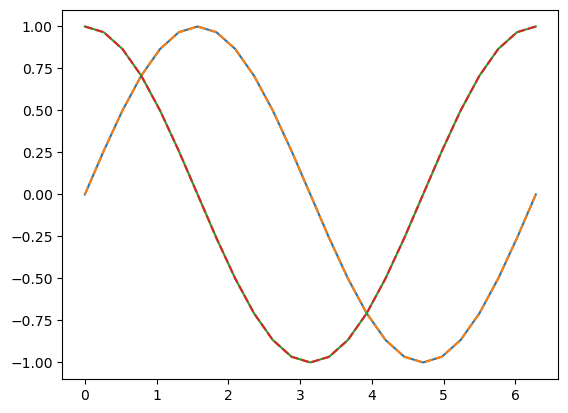

In [23]:
plt.plot(a.detach(), b.detach(), a.detach(), torch.sin(a).detach(), '--')
plt.plot(a.detach(), a.grad.detach(), a.detach(), torch.cos(a).detach(),'--')

In [25]:
## we can do operations that do not accumulate gradient

a = torch.ones(2, 3, requires_grad=True)
print(f'a = {a}')

b1 = 2 * a ## tracking of gradient is on for b1
print(f'b1 = {b1}')

a.requires_grad = False
print('\n\nswitching off gradient tracking')
print(f'a = {a}')
b2 = 2 * a ## now tracking of gradient is off for b2
print(f'b2 = {b2}')

a = tensor([[1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)
b1 = tensor([[2., 2., 2.],
        [2., 2., 2.]], grad_fn=<MulBackward0>)


switching off gradient tracking
a = tensor([[1., 1., 1.],
        [1., 1., 1.]])
b2 = tensor([[2., 2., 2.],
        [2., 2., 2.]])


In [26]:
a = torch.ones(2, 3, requires_grad=True) * 2
b = torch.ones(2, 3, requires_grad=True) * 3

c1 = a + b
print(f'a = {a}')
print(f'b = {b}')
print(f'c1 = {c1}')

print('\n\nswitching off gradient tracking')
with torch.no_grad():
    c2 = a + b

print(f'c2 = {c2}')

print('\n\n gradient tracking is back on')
c3 = a * b
print(f'c3 = {c3}')

a = tensor([[2., 2., 2.],
        [2., 2., 2.]], grad_fn=<MulBackward0>)
b = tensor([[3., 3., 3.],
        [3., 3., 3.]], grad_fn=<MulBackward0>)
c1 = tensor([[5., 5., 5.],
        [5., 5., 5.]], grad_fn=<AddBackward0>)


switching off gradient tracking
c2 = tensor([[5., 5., 5.],
        [5., 5., 5.]])


 gradient tracking is back on
c3 = tensor([[6., 6., 6.],
        [6., 6., 6.]], grad_fn=<MulBackward0>)
